# Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC



# Load Dataset

In [2]:
data=pd.read_csv("titanic_data.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Numerical Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

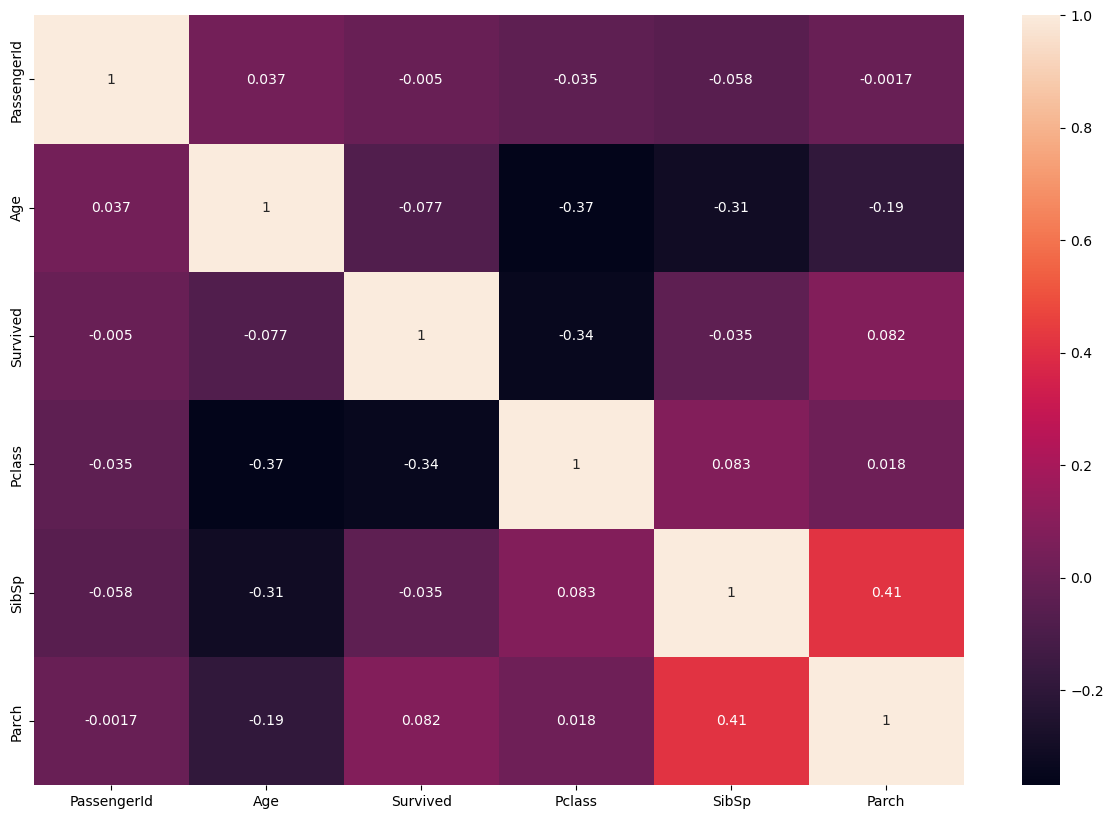

In [9]:
plt.figure(figsize=(15,10))
sn.heatmap(data[["PassengerId","Age","Survived","Pclass","SibSp","Parch"]].corr(),annot=True)

In [10]:
data["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

<Axes: xlabel='SibSp', ylabel='count'>

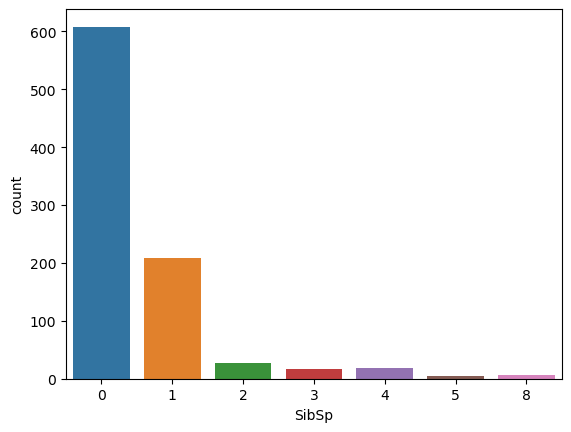

In [15]:
sn.countplot(data=data,x="SibSp")


<Axes: ylabel='count'>

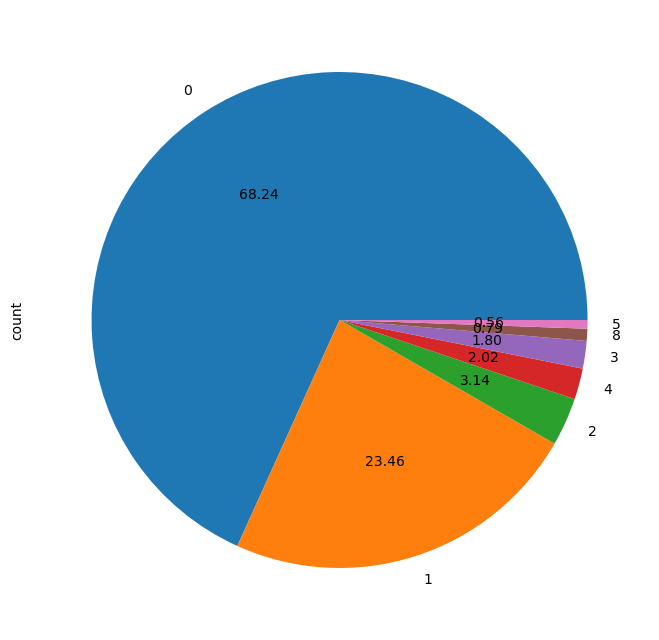

In [17]:
plt.figure(figsize=(8,15))
data["SibSp"].value_counts().plot(kind="pie",autopct="%0.2f")

<Axes: xlabel='SibSp', ylabel='Survived'>

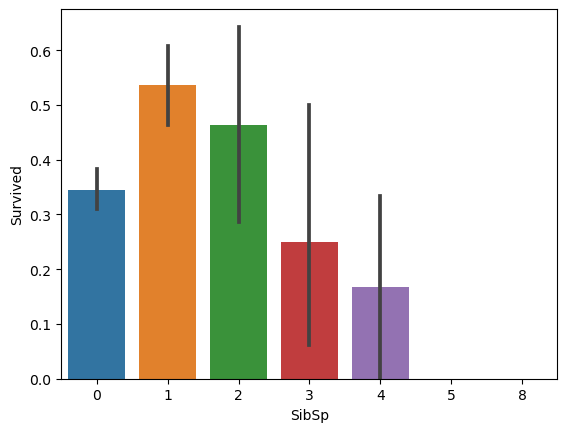

In [21]:
sn.barplot(data=data,x="SibSp",y="Survived")

C:\Users\tanta\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\tanta\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\tanta\anaconda3\Lib\s

<Figure size 1000x1000 with 0 Axes>

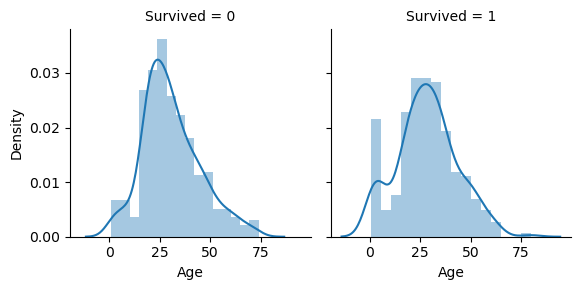

In [25]:
plt.figure(figsize=(10,10))
age=sn.FacetGrid(data=data,col="Survived")
age=age.map(sn.distplot,'Age')

<Axes: xlabel='Age', ylabel='Count'>

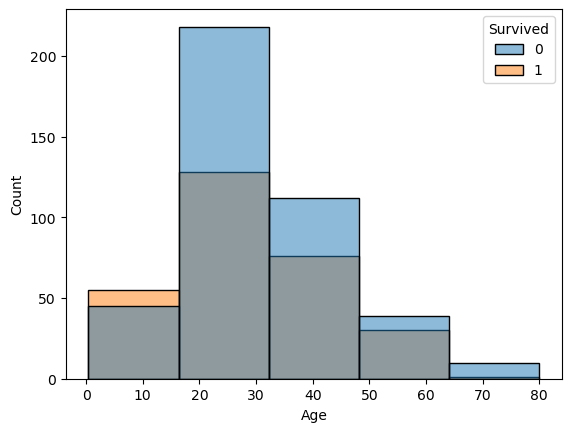

In [33]:
sn.histplot(data=data,x="Age",bins=5,hue="Survived")

<Axes: xlabel='Age', ylabel='Survived'>

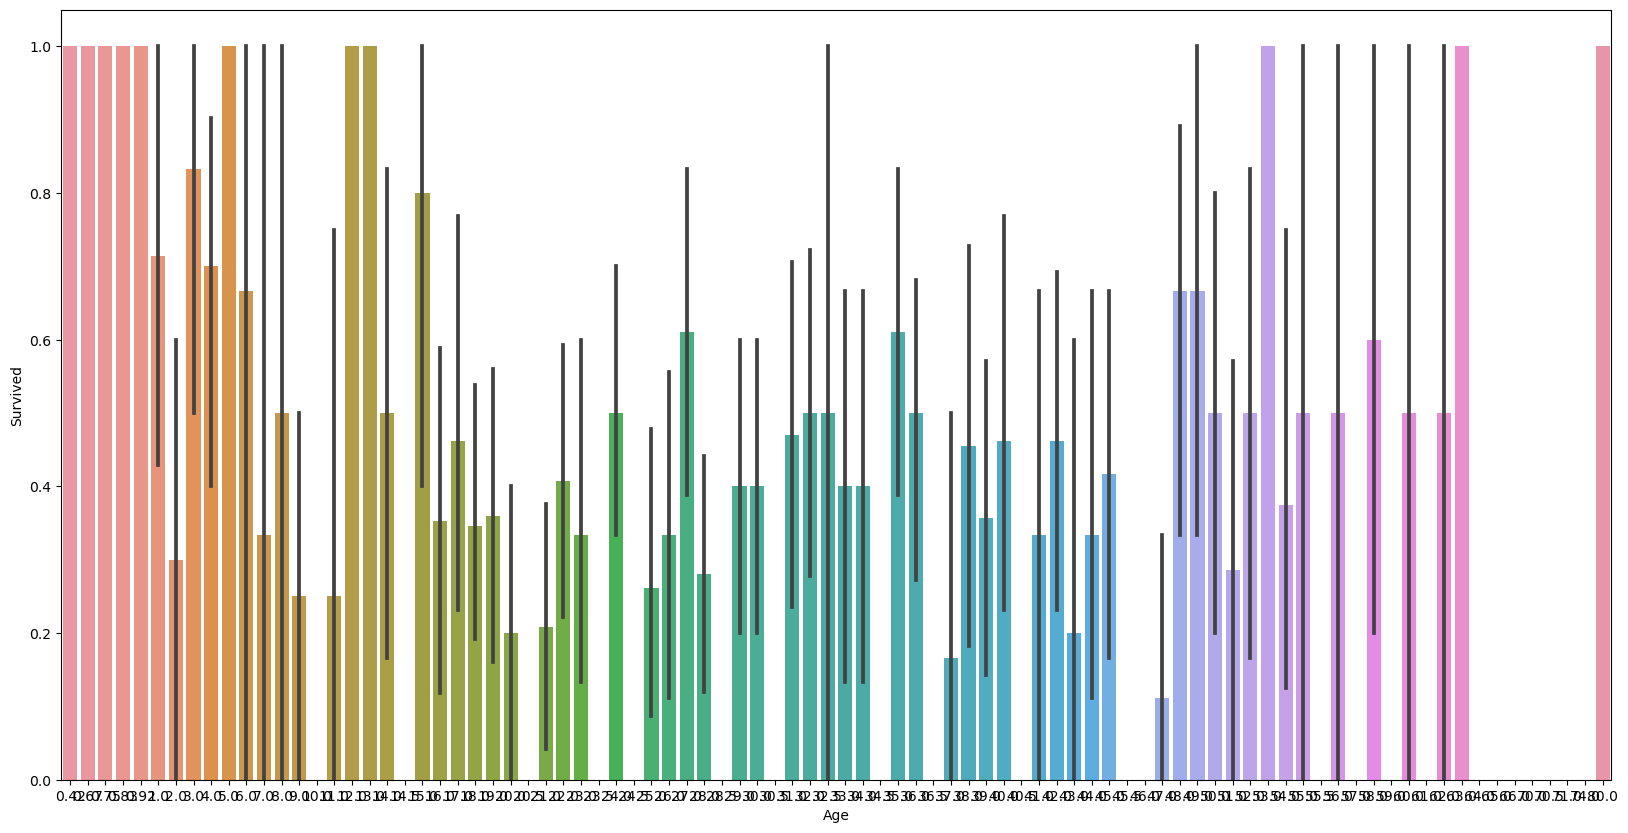

In [36]:
plt.figure(figsize=(20,10))
sn.barplot(data=data,x="Age",y="Survived")

<Axes: xlabel='Sex', ylabel='Survived'>

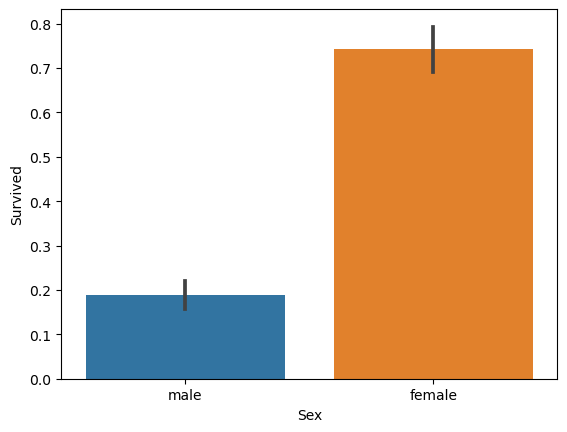

In [37]:
sn.barplot(data,x="Sex",y="Survived")


In [38]:
data[["Sex","Survived"]].groupby("Sex").value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [40]:
sn.barplot(data,x="Class",y="Survived")

ValueError: Could not interpret input 'Class'

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Pclass', ylabel='Survived'>

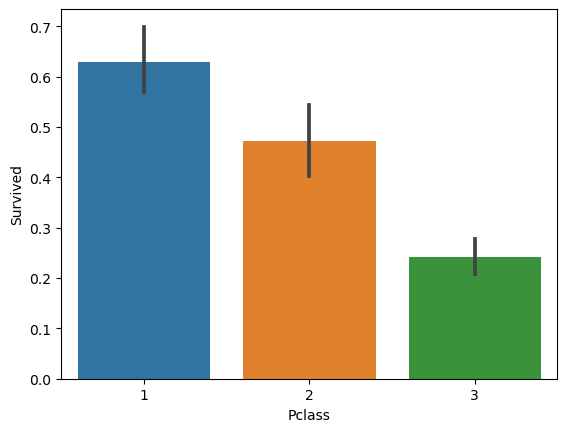

In [42]:
sn.barplot(data,x="Pclass",y="Survived")

<Axes: ylabel='count'>

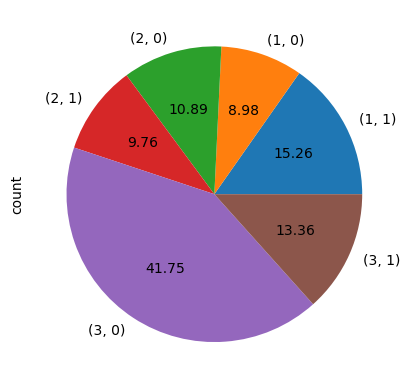

In [44]:
data[["Pclass","Survived"]].groupby("Pclass").value_counts()

<Axes: ylabel='count'>

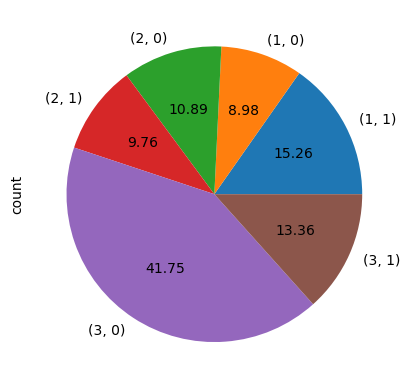

In [45]:
data[["Pclass","Survived"]].groupby("Pclass").value_counts().plot(kind="pie",autopct="%0.2f")

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
data["Embarked"].nunique()

3

In [84]:
data["Embarked"].unique()

array(['S', 'C', 'Q', 'Null'], dtype=object)

<Axes: xlabel='Embarked', ylabel='Survived'>

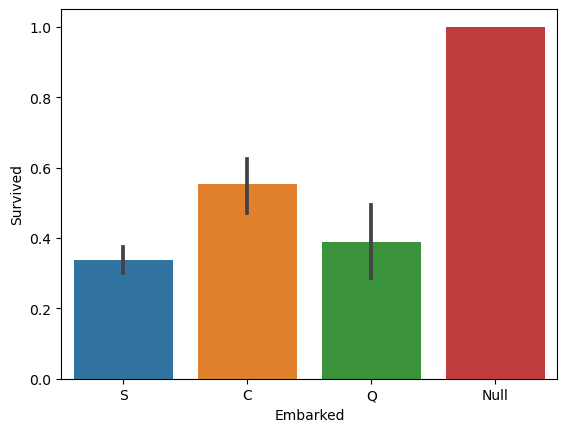

In [82]:
sn.barplot(data,x="Embarked",y="Survived")

In [83]:
data[["Embarked","Survived"]].groupby("Embarked").value_counts()

Embarked  Survived
C         1            93
          0            75
Null      1             2
Q         0            47
          1            30
S         0           427
          1           217
Name: count, dtype: int64

<Axes: ylabel='count'>

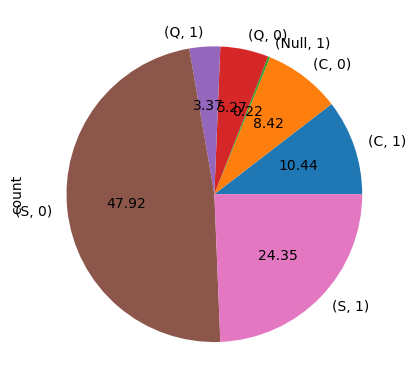

In [55]:
data[["Embarked","Survived"]].groupby("Embarked").value_counts().plot(kind="pie",autopct="%0.2f")

<Axes: xlabel='Embarked', ylabel='Survived'>

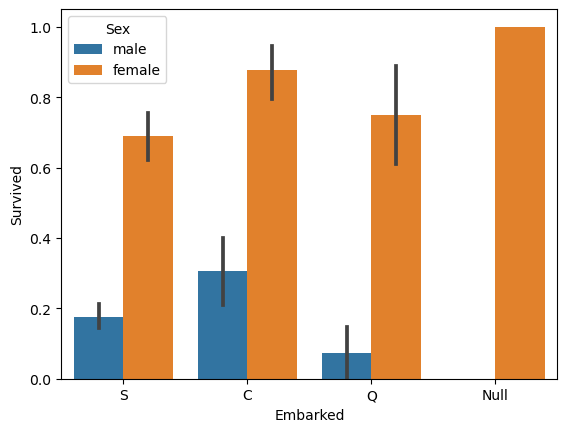

In [56]:
sn.barplot(data,x="Embarked",y="Survived",hue="Sex")